In [2]:
from double_sdes import crypte_double_sdes, decrypte_double_sdes, cassage_astucieux, cassage_brutal, cassage_brutal_avec_thread
from autres import genere_key_10_bits, genere_key_256_bits
from steganographie import retrouve_cle
from analyse_trace import retrouve_messages_trace, decrypte_message_alice_et_bob
from aes import crypte_aes, decrypte_aes, cassage_brutal_aes, estimation_temps_cassage_brutal

import time
import constantes2 as cons
import matplotlib.pyplot as plt
import numpy as np

## Partie 1 : premières tentatives

### Double SDES

Génération des clés

In [3]:
key1 = 0b0100001011
key2 = 10
print("key1 : ", key1)
print("key2 : ", key2)

key1 :  267
key2 :  10


Cryptage des messages sur celene avec le double SDES. Ces messages sont cryptés grâce à des clés de 8 bits générées aléatoirement.

In [4]:
debut = time.time()
message_lupin_crypter = crypte_double_sdes(cons.ARSENE_LUPIN, key1, key2)
temps_cryptage_double_sdes_lupin = time.time() - debut
debut = time.time()
message_lettre_crypter = crypte_double_sdes(cons.LETTRES_PERSONES, key1, key2)
temps_cryptage_double_sdes_lettre = time.time() - debut
debut = time.time()
message_phrase_test_crypter = crypte_double_sdes(cons.PHRASE_TEST, key1, key2)
temps_cryptage_double_sdes_phrase = time.time() - debut
print("Message crypté : ", message_lupin_crypter, "en ", temps_cryptage_double_sdes_lupin, " secondes")
print("Message crypté : ", message_lettre_crypter, "en ", temps_cryptage_double_sdes_lettre, " secondes")
print("Message crypté : ", message_phrase_test_crypter, "en ", temps_cryptage_double_sdes_phrase, " secondes")

Message crypté :  s¸¦¾obÓ¸¦b5¿Ó¦¸;oâ¦ÛÓ¸5ÓÓ5ÒÛ¦5¿ÒÓ;Ûo¦G;¸f¦;¸¦5;¸f5Óf¦Û¦b;o¦G5¸¦f;o¦Û¦¼;o¸5o.¦GboÓ¦G¦¿;Óâ¦Û¸Ó¿5fÓo¦b;¸¸5¦5¦oÓ¦Û¦Óo.¦5¸Ó¿5GÞ¦¸;f¦¿ÓÛÛo¦b;ÛÓÓÞ¦55Óf¦¸5¦¦GoÛ¦¦¿;f¦G;¸f¦Û¦bÓbfÓ¦¦G;oÛ5Ó¸f¦G¦à5;¸¦Ó¦bÓff;oâ¦s¸¦¾obÓ¸Þ¦Û¦à5¸f5ÓÓf¦¸fÛ¿5¸¦oÓ¦¸;b¦o¦G5¸¦Û¦ß\f5o.¦f¦Û¦5Û;¸Þ¦f¦oÓÞ¦o¸¦¸oÓfÞ¦;K¦ÓÛ¦55Óf¦b¸f¦ßÈ¦Û¦Ò5;¸¦aß;¿5¸¸Þ¦¸¦f5Óf¦b5fÓ¦Û¦¿5Ó¸¦ÓG¦f¦55Óf¦Û5Ó¦5¦5fÞ¦;¸¦G¦ff¦à;¿oÛ¦Ys¸¦¾obÓ¸Þ¦¸fÛ¿5¸ÿ5¿ÒÓ;ÛoÞ¦Ó¸G5¦o5¸G¦Û¦¿oÒÛ¦;¸f¦5ofß¸fÓoéT¦s¸¦¾obÓ¸Þ¦Ûß;¿¿¦5o.¦¿ÓÛÛ¦GoÓ¿¸f¦f;o¦¦f;o¦ß5oààoÞ¦f¸;Þ¦Ò;;-¿5-Þ¦àÓÛ¦G¦à5¿ÓÛÛÞ¦5G;Û¸fÞ¦ÓÓÛÛ5GÞ¦;¿¿Óÿ;#5o¦¿5ÓÛÛ5ÓÞ¦¿GÓ¸¦oÞ¦f;;¦b5¸;Ûâ en  0.017715930938720703  secondes
Message crypté :  ;o¦5;¸¦¼;o¸¦o¸¦¼;o¦¦±;¿T¦¾;o¦¸;o¦!¿¦à5Óf¦¸;¦G;fÓ;¸¦o¦Û¦f;¿Ò5o¦G¦Û5¦Ó¦oÓ¦5¦¿Ó¦5o¦¿;¸G¦G;oÈ¦b;

Decryptage des messages cryptés avec le double SDES.

In [5]:
debut = time.time()
message_lupin_decrypter = decrypte_double_sdes(message_lupin_crypter, key1, key2)
temps_decryptage_double_sdes_lupin = time.time() - debut
debut = time.time()
message_lettre_decrypter = decrypte_double_sdes(message_lettre_crypter, key1, key2)
temps_decryptage_double_sdes_lettre = time.time() - debut
debut = time.time()
message_phrase_test_decrypter = decrypte_double_sdes(message_phrase_test_crypter, key1, key2)
temps_decryptage_double_sdes_phrase = time.time() - debut
print("Message decrypté : ", message_lupin_decrypter, "en ", temps_decryptage_double_sdes_lupin, " secondes")
print("Message decrypté : ", message_lettre_decrypter, "en ", temps_decryptage_double_sdes_lettre, " secondes")
print("Message decrypté : ", message_phrase_test_decrypter, "en ", temps_decryptage_double_sdes_phrase, " secondes")

Message decrypté :  Arsène Lupin parmi nous! l'insaisissable cambrioleur dont on racontait les prouesses dans tous les journaux depuis des mois! l'énigmatique personnage avec qui le vieux Ganimard, notre meilleur policier, avait engagé ce duel à mort dont les péripéties se déroulaient de façon si pittoresque! Arsène Lupin, le fantaisiste gentleman qui n'opère que dans les châteaux et les salons, et qui, une nuit, où il avait pénétré chez le baron Schormann, en était parti les mains vides et avait laissé sa carte, ornée de cette formule: «Arsène Lupin, gentleman-cambrioleur, reviendra quand les meubles seront authentiques». Arsène Lupin, l'homme aux mille déguisements: tour à tour chauffeur, ténor, bookmaker, fils de famille, adolescent, vieillard, commis-voyageur marseillais, médecin russe, torero espagnol! en  0.018252849578857422  secondes
Message decrypté :  Nous navons séjourné quun jour à Com. Lorsque nous eûmes fait nos dévotions sur le tombeau de la vierge qui a mis au monde d

Cassage du double SDES avec une attaque par force brute. Cette attaque teste toutes les clés possibles et renvoie la paire de clés qui a permis de crypter le message, le temps de calcul et le nombre de clés testées.

In [44]:
cle1, cle2, nombre_tentatives, temps = cassage_brutal(cons.PHRASE_TEST, message_phrase_test_crypter)
print("Cle1 : ", cle1)
print("Cle2 : ", cle2)
print("Nombre de tentative : ", nombre_tentatives)
print("Temps : ", temps, "s")

Cle1 :  267
Cle2 :  10
Nombre de tentative :  273419
Temps :  155.74 s


Il est possible de gagner du temps sur la méthode de cassage brutal en utilisant des threads. En effet, on peut lancer plusieurs threads qui vont tester des clés différentes en même temps. On peut ainsi gagner un temps considérable.

In [45]:
cle1, cle2, nombre_tentatives, temps = cassage_brutal_avec_thread(cons.PHRASE_TEST, message_phrase_test_crypter)
print("Cle1 : ", cle1)
print("Cle2 : ", cle2)
print("Nombre de tentative : ", nombre_tentatives)
print("Temps : ", temps, "s")

Nombre de threads: 8
Cle1 :  267
Cle2 :  10
Nombre de tentative :  91932
Temps :  58.708528995513916 s


Cassage du double SDES avec une attaque astucieuse qui permet de réduire le nombre de clés à tester. Cette attaque renvoie la paire de clés qui a permis de crypter le message, le temps de calcul et le nombre de clés testées.

In [64]:
cle1, cle2, nombre_tentative, temps = cassage_astucieux(cons.PHRASE_TEST, message_phrase_test_crypter)
print("Cle1 : ", cle1)
print("Cle2 : ", cle2)
print("Nombre de tentative : ", nombre_tentative)
print("Temps : ", temps, "s")

Cle1 :  267
Cle2 :  10
Nombre de tentative :  1035
Temps :  0.599 s


Evaluation des deux méthodes de cassage en fonction du nombre de clés testées et du temps de calcul. Comparaison avec la méthode de cassage par force brute.

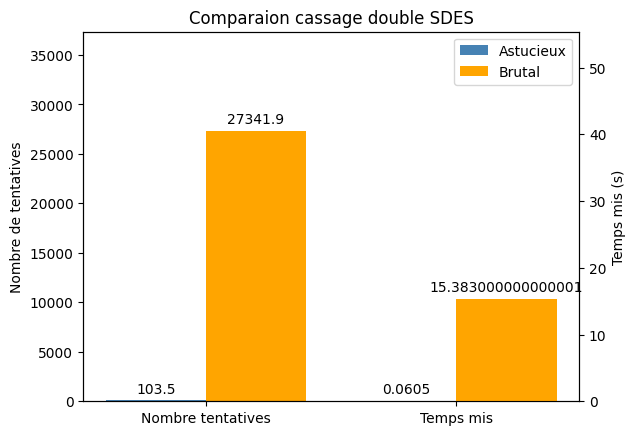

In [11]:
res_astucieux = 0, 0, 0, 0
res_brutal = 0, 0, 0, 0

for i in range(1):
    cle1, cle2, nombre_tentative, temps = cassage_astucieux(cons.PHRASE_TEST, message_phrase_test_crypter)
    res_astucieux = res_astucieux[0] + cle1, res_astucieux[1] + cle2, res_astucieux[2] + nombre_tentative, res_astucieux[3] + temps
    cle1, cle2, nombre_tentatives, temps = cassage_brutal(cons.PHRASE_TEST, message_phrase_test_crypter)
    res_brutal = res_brutal[0] + cle1, res_brutal[1] + cle2, res_brutal[2] + nombre_tentatives, res_brutal[3] + temps

res_astucieux = res_astucieux[0] / 10, res_astucieux[1] / 10, res_astucieux[2] / 10, res_astucieux[3] / 10
res_brutal = res_brutal[0] / 10, res_brutal[1] / 10, res_brutal[2] / 10, res_brutal[3] / 10

# Données
categories = ['Nombre tentatives', 'Temps mis']
tentatives = [res_astucieux[2], res_brutal[2]]
temps = [res_astucieux[3], res_brutal[3]]

# Création du graphique
fig, ax = plt.subplots()

ax.set_ylim(0, max(tentatives) + 10000)
ax.set_title("Comparaion cassage double SDES")
ax.set_ylabel("Nombre de tentatives")
ax.set_xticks(np.arange(len(categories)))
ax.set_xticklabels(categories)

# Création des barres
barres1 = ax.bar(np.arange(1) -0.2, tentatives[0], 0.4, label="Astucieux", color="steelblue")
barres2 = ax.bar(np.arange(1) +0.2, tentatives[1], 0.4, label="Brutal", color="orange")

ax.legend()
axe2 = ax.twinx()
axe2.set_ylabel("Temps mis (s)")
axe2.set_ylim(0, max(temps) + 40)
bar1 = axe2.bar(np.arange(1) + 1 -0.2, temps[0], 0.4, color="steelblue")
bar2 = axe2.bar(np.arange(1) + 1 +0.2, temps[1], 0.4, color="orange")

# Ajout des valeurs au dessus des barres
def ajouter_valeur(barres, axe):
    for barre in barres:
        hauteur = barre.get_height()
        axe.annotate('{}'.format(hauteur),
                    xy=(barre.get_x() + barre.get_width() / 2, hauteur),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

ajouter_valeur(barres1, ax)
ajouter_valeur(barres2, ax)
ajouter_valeur(bar1, axe2)
ajouter_valeur(bar2, axe2)

# Affichage du graphique
plt.show()

## Partie 2 : un peu d'aide

Génération de la clé

In [48]:
key = genere_key_256_bits()

Cryptage des messages celene avec l'AES. Ces messages sont cryptés grâce à une clé de 256 bits générée aléatoirement.

In [49]:
debut = time.time()
message_lupin_crypter_aes = crypte_aes(cons.ARSENE_LUPIN, key)
temps_cryptage_aes_lupin = time.time() - debut
debut = time.time()
message_lettre_crypter_aes = crypte_aes(cons.LETTRES_PERSONES, key)
temps_cryptage_aes_lettre = time.time() - debut
debut = time.time()
message_phrase_test_crypter_aes = crypte_aes(cons.PHRASE_TEST, key)
temps_cryptage_aes_phrase = time.time() - debut
print("Message crypté : ", message_lupin_crypter_aes, "en ", temps_cryptage_aes_lupin, " secondes")
print("Message crypté : ", message_lettre_crypter_aes, "en ", temps_cryptage_aes_lettre, " secondes")
print("Message crypté : ", message_phrase_test_crypter_aes, "en ", temps_cryptage_aes_phrase, " secondes")

Message crypté :  674141414141426c684d6d315274757569594844753641765959784675632d36314e786a67774c7a316d312d53623070447441494d515743682d4d33756b5947456d324d703937654b673756305a786e4b4668703730596a434d62444f35656d5879655a6b7148556a4b5856667639483873456c566f42776d6674744a39726a366f47326744364832562d336356687a5167593855777075734942527638416f7438787a715153356e6e3278634d6e3833526e2d4e524e443551516475447a63694c524163485755655373306d376449706c45524a586d437546484943754973684f394c56644e315168794e597563664e4d4578436e6d50646650333543664e5876486c2d6e45592d365a7136352d6d7477795a6e56706a59436c636c38686464534168495f72615f765f4845594b4e6270666f485a754866446f526b2d366a5f6868767933746f55374e4a367373586b3044326f5f746872346359367837493737515072773350766d526f69664e494f52454c462d576d586363732d6e6e4a6a4a62696b386c4e6650727a537a7a57454c63372d6338494d594872566a6d30794c3470506566567739675f396677494e6f71396b356f567268675f4e31424f5a714b656a665750596f563350695468326a435759776b525948624d57726d31435767696b4941677a4148

Decryptage des messages cryptés avec l'AES.

In [50]:
debut = time.time()
message_lupin_decrypter_aes = decrypte_aes(message_lupin_crypter_aes, key)
temps_decryptage_aes_lupin = time.time() - debut
debut = time.time()
message_lettre_decrypter_aes = decrypte_aes(message_lettre_crypter_aes, key)
temps_decryptage_aes_lettre = time.time() - debut
debut = time.time()
message_phrase_test_decrypter_aes = decrypte_aes(message_phrase_test_crypter_aes, key)
temps_decryptage_aes_phrase = time.time() - debut
print("Message decrypté : ", message_lupin_decrypter_aes, "en ", temps_decryptage_aes_lupin, " secondes")
print("Message decrypté : ", message_lettre_decrypter_aes, "en ", temps_decryptage_aes_lettre, " secondes")
print("Message decrypté : ", message_phrase_test_decrypter_aes, "en ", temps_decryptage_aes_phrase, " secondes")

Message decrypté :  Arsène Lupin parmi nous! l'insaisissable cambrioleur dont on racontait les prouesses dans tous les journaux depuis des mois! l'énigmatique personnage avec qui le vieux Ganimard, notre meilleur policier, avait engagé ce duel à mort dont les péripéties se déroulaient de façon si pittoresque! Arsène Lupin, le fantaisiste gentleman qui n'opère que dans les châteaux et les salons, et qui, une nuit, où il avait pénétré chez le baron Schormann, en était parti les mains vides et avait laissé sa carte, ornée de cette formule: «Arsène Lupin, gentleman-cambrioleur, reviendra quand les meubles seront authentiques». Arsène Lupin, l'homme aux mille déguisements: tour à tour chauffeur, ténor, bookmaker, fils de famille, adolescent, vieillard, commis-voyageur marseillais, médecin russe, torero espagnol! en  0.0006771087646484375  secondes
Message decrypté :  Nous n’avons séjourné qu’un jour à Com. Lorsque nous eûmes fait nos dévotions sur le tombeau de la vierge qui a mis au monde 

Comparaison des temps de calculs entre le double SDES et l'AES. Cette comparaison est faite en prenant la moyenne des temps de calculs des trois différents messages.

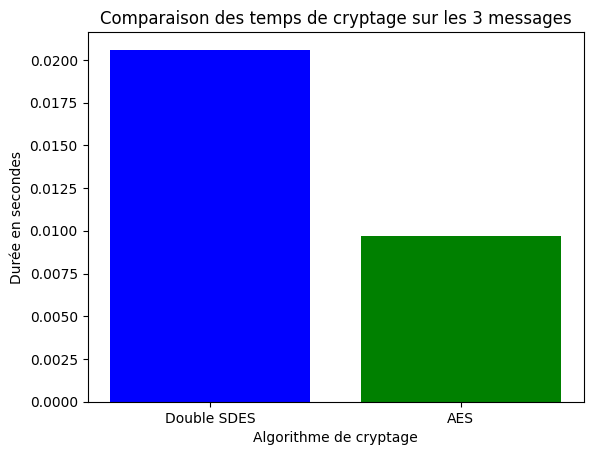

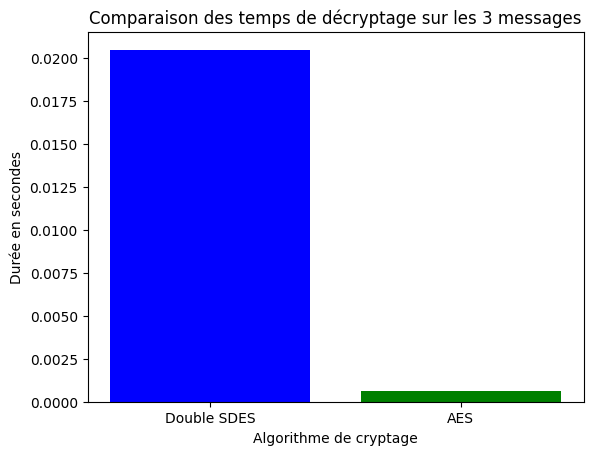

In [51]:
# Temps en secondes
moyenne_temps_cryptage_double_sdes = (temps_cryptage_double_sdes_lupin + temps_cryptage_double_sdes_lettre + temps_cryptage_double_sdes_phrase) / 3
moyenne_temps_cryptage_aes = (temps_cryptage_aes_lupin + temps_cryptage_aes_lettre + temps_cryptage_aes_phrase) / 3
temps = [moyenne_temps_cryptage_double_sdes, moyenne_temps_cryptage_aes]
noms_temps = ['Double SDES', 'AES']

# Créer un graphique à barres pour comparer les temps
plt.bar(noms_temps, temps, color=['blue', 'green'])

# Ajouter des labels et un titre
plt.xlabel('Algorithme de cryptage')
plt.ylabel('Durée en secondes')
plt.title('Comparaison des temps de cryptage sur les 3 messages')

# Afficher le graphique
plt.show()

moyenne_temps_decryptage_double_sdes = (temps_decryptage_double_sdes_lupin + temps_decryptage_double_sdes_lettre + temps_decryptage_double_sdes_phrase) / 3
moyenne_temps_decryptage_aes = (temps_decryptage_aes_lupin + temps_decryptage_aes_lettre + temps_decryptage_aes_phrase) / 3
temps = [moyenne_temps_decryptage_double_sdes, moyenne_temps_decryptage_aes]
noms_temps = ['Double SDES', 'AES']

# Créer un graphique à barres pour comparer les temps
plt.bar(noms_temps, temps, color=['blue', 'green'])

# Ajouter des labels et un titre
plt.xlabel('Algorithme de cryptage')
plt.ylabel('Durée en secondes')
plt.title('Comparaison des temps de décryptage sur les 3 messages')

plt.show()

Cassage brutal de l'AES. Cette attaque teste toutes les clés possibles et renvoie la clé qui a permis de crypter le message, le temps de calcul et le nombre de clés testées.

In [ ]:
print(cassage_brutal_aes(cons.ARSENE_LUPIN, message_lupin_crypter))
print(cassage_brutal_aes(cons.LETTRES_PERSONES, message_lettre_crypter))
print(cassage_brutal_aes(cons.PHRASE_TEST, message_phrase_test_crypter))

# Trop lonnnnnnng

Le cassage brutal de l'AES est impossible à réaliser en un temps raisonnable. Il faut donc estimer ce temps.

In [52]:
temps_mini, temps_moyens, temps_maxi = estimation_temps_cassage_brutal(cons.ARSENE_LUPIN, message_lupin_crypter)
print("Temps mini : ", temps_mini , "s")
print("Temps moyens : ", temps_moyens, "s soit ", temps_moyens / 60, "min", "soit ", temps_moyens / 3600, "h", "soit ", temps_moyens / 86400, "j", "soit ", temps_moyens / 31536000, "an soit ", temps_moyens / 31536000 / 1000, "millenium")
print("Temps maxi : ", temps_maxi, "s soit ", temps_maxi / 60, "min", "soit ", temps_maxi / 3600, "h", "soit ", temps_maxi / 86400, "j", "soit ", temps_maxi / 31536000, "an soit ", temps_maxi / 31536000 / 1000, "millenium")

Temps mini :  0.001708984375 s
Temps moyens :  9.894343562758952e+73 s soit  1.6490572604598254e+72 min soit  2.7484287674330422e+70 h soit  1.145178653097101e+69 j soit  3.1374757619098658e+66 an soit  3.137475761909866e+63 millenium
Temps maxi :  1.9788687125517904e+74 s soit  3.2981145209196508e+72 min soit  5.4968575348660844e+70 h soit  2.290357306194202e+69 j soit  6.2749515238197315e+66 an soit  6.274951523819732e+63 millenium


Analyse des deux images fournies. Pour retrouver la clé cachée par MrRobot.

In [53]:
la_cle_cachee = retrouve_cle("../sujet/rossignol2.bmp")
print("La clé cachée est : ", la_cle_cachee)

La clé cachée est :  1110011101101101001100010011111110010010101110011001000001001100


## Partie 3 : analyse des messages

Recherche des messages dans la trace réseau.

In [54]:
les_messages = retrouve_messages_trace('../sujet/trace_sae.cap')
print("Les messages sont : ", les_messages)

Les messages sont :  [(b"\xd7\xc4\x87\x16U\x84gh]\xe7\xd8\xc8\x8e\x0c\xcf\xb7\xf7\xe2hy\x1b\x181z\x9d\xae\x05\xa7'!\xfe\xed", b'\xe5\xc4\x17\x1c\xb3\x030\x99\xb6I\xcc\xf847\x8c\x9b'), (b'\x07%S\x82V\x9d\xd2\x9d\x81\xf3\xb7(\x17\xeb%\x9a\xdcG\xca\xden=S\x97WWW\\\x98\x95mR', b'\xd5\x8a\xc5\xbd,:D\x96\xc0\xcbz\x80@G\xec\x83')]


Decrypatge des messages avec l'AES en mode CBC

In [55]:
les_messages_decryptés = decrypte_message_alice_et_bob(la_cle_cachee, les_messages)
for message in les_messages_decryptés:
    print("Message : ", message)

Message :  La crypto c'est trop bien!
Message :  Je suis complètement d'accord!
